In [1]:
# Tehdään perus EDA (Explorative Data Analysis)
!pip install ydata-profiling
!pip install setuptools

In [2]:
"""
# Tarkastellaan ja poistetaan Outlierit
# Täydellä datalla, kestää noin 6.5min
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
df.boxplot(column=['x', 'y'])
plt.title('Boxplot of X and Y Variables')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

print(df.describe())

"""

"\n# Tarkastellaan ja poistetaan Outlierit\n# Täydellä datalla, kestää noin 6.5min\nimport matplotlib.pyplot as plt\n%matplotlib inline\nplt.figure(figsize=(10, 6))\ndf.boxplot(column=['x', 'y'])\nplt.title('Boxplot of X and Y Variables')\nplt.ylabel('Values')\nplt.xlabel('Variables')\nplt.show()\n\nprint(df.describe())\n\n"

In [3]:
import duckdb
import pandas as pd
duckdb_path = "data/duckdb.database" # Duckdb tietokannalle annettava nimi, tallentuu lokaalisti
table_name = "Silver_SensorData" # Tietokantataulu, josta luetaan (voi olla myös Silver_SensorData_lite)

# Ota yhteys tietokantaa ja tarkista mitä dataa taulusta löytyy
conn = duckdb.connect(database=duckdb_path)
conn.table(table_name).show()
conn.close()

┌─────────┬──────────────────────┬───────┬───────┬───┬──────────┬───────────┬──────────────┬───────────┬───────────┐
│ node_id │      timestamp       │   x   │   y   │ … │ distance │ timedelta │    speed     │ x_scaled  │ y_scaled  │
│  int32  │      timestamp       │ int32 │ int32 │   │  float   │   int32   │    float     │   float   │   float   │
├─────────┼──────────────────────┼───────┼───────┼───┼──────────┼───────────┼──────────────┼───────────┼───────────┤
│    3200 │ 2019-03-07 13:46:2…  │     0 │     0 │ … │      0.0 │         1 │          0.0 │     125.0 │      26.0 │
│    3200 │ 2019-03-13 17:29:4…  │   -50 │    50 │ … │   70.711 │    531801 │ 4.786745e-06 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:4…  │   -50 │    50 │ … │      0.0 │         1 │          0.0 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:4…  │   -50 │    50 │ … │      0.0 │         1 │          0.0 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:4…  │   -50 │    50 │ … │      0.0 

In [4]:
import duckdb
import pandas as pd
import polars as pl

# Ota yhteys tietokantaa ja tarkista mitä dataa taulusta löytyy
conn = duckdb.connect(database=duckdb_path)
df = conn.sql(f"SELECT * FROM {table_name}").pl() # Tallenentaan taulun data Polars dataframeen
conn.close()

In [5]:
df = df.to_pandas()

KeyboardInterrupt: 

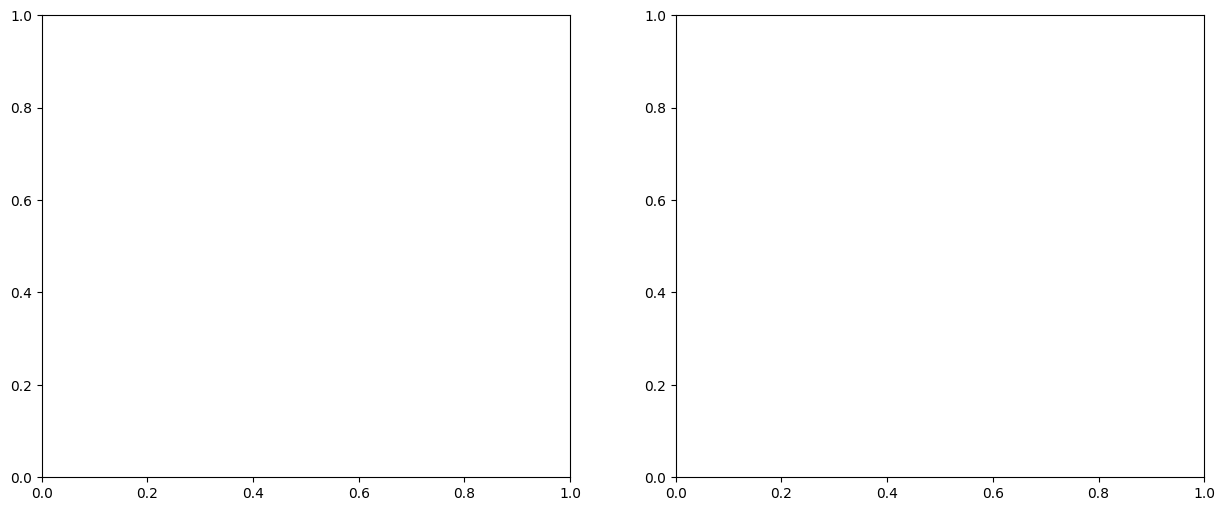

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Boxplot for x_scaled and y_scaled
df[['x_scaled', 'y_scaled']].boxplot(ax=axes[0])
axes[0].set_title('Boxplot of x_scaled and y_scaled')
axes[0].set_ylabel('Values')
axes[0].set_xlabel('Variables')

# Boxplot for speed and distance
df[['speed', 'distance']].boxplot(ax=axes[1])
axes[1].set_title('Boxplot of speed and distance')
axes[1].set_ylabel('Values')
axes[1].set_xlabel('Variables')

plt.tight_layout()
plt.show()

print(df.describe())


In [7]:
df.count()

node_id       38977673
timestamp     38977673
x             38977673
y             38977673
previous_x    38977673
previous_y    38977673
distance      38977673
timedelta     38977673
speed         38977673
x_scaled      38977673
y_scaled      38977673
dtype: int64